# Подгрузка данных

In [248]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [249]:
# 1-ая модель для предсказания
from sklearn.ensemble import IsolationForest
# 2-ая модель для предсказания
from pyod.models.knn import KNN
# для визуализации
import matplotlib.pyplot as plt
# для работы с данными
import pandas as pd
# для математических вычислений
import numpy as np

Для работы с визуализацией, необходимо подгрузить файлы

* web_response.csv
* throughput.csv
* apdex.csv
* error.csv

из папки [**metrics**](https://github.com/ArturArtikov/Redlab_Hack/tree/main/metrics) в Github и поменять пути к файлам в коде ниже

Также необходимо добавить в рабочую область файл [**visualisation.py**](https://github.com/ArturArtikov/Redlab_Hack/blob/main/visualisation.py) для визуализации с помощью библиотеки ***streamlit*** в конце данного файла-ноутбука



In [250]:
# данные по метрике web_response
web_response = pd.read_csv('/content/drive/MyDrive/Redlab/web_response.csv')
# данные по метрике throughput
throughput = pd.read_csv('/content/drive/MyDrive/Redlab/throughput.csv')
# данные по метрике apdex
apdex = pd.read_csv('/content/drive/MyDrive/Redlab/apdex.csv')
# данные по метрике error
error = pd.read_csv('/content/drive/MyDrive/Redlab/error.csv')

# переводим временные метки в форматы даты и времени
web_response['point'] = pd.to_datetime(web_response['point'])
throughput['point'] = pd.to_datetime(throughput['point'])
apdex['point'] = pd.to_datetime(apdex['point'])
error['point'] = pd.to_datetime(error['point'])

In [251]:
# создаем датафреймы для переопределения данных из времени в временные метки
signal1 = pd.DataFrame([])
signal2 = pd.DataFrame([])
signal3 = pd.DataFrame([])
signal4 = pd.DataFrame([])

# создаем временную метку для дат
signal1['timestamp'] = web_response['point'].apply(lambda x: int(x.timestamp()))
# добавляем данные метрики
signal1['value'] = web_response['web_response']

# создаем временную метку для дат
signal2['timestamp'] = throughput['point'].apply(lambda x: int(x.timestamp()))
# добавляем данные метрики
signal2['value'] = throughput['call_count']

# создаем временную метку для дат
signal3['timestamp'] = apdex['point'].apply(lambda x: int(x.timestamp()))
# добавляем данные метрики
signal3['value'] = apdex['apdex']

# создаем временную метку для дат
signal4['timestamp'] = error['point'].apply(lambda x: int(x.timestamp()))
# добавляем данные метрики
signal4['value'] = error['call_count']

# Работа с данными и машинным обучением


При запуска кода ниже вам предоставят возможность ввести дату и время момента, с которого вы хотите получить данные.

> Обращаем внимание, что в целях экономии оперативной памяти и ввиду отсутствия информции о устройстве, на котором будут проводится тесты мы даем возможность получить срез данных в размере ***8 часов*** после того момента, который будет указан вами при вводе данных ниже

**Пожалуйста, указывайте начало временного интервала в формате "ГГГГ-ММ-ДД ЧЧ:ММ:СС" - без кавычек и с пробелом между датой и временем, во избежание проблем с визуализацией данных**

In [252]:
time = input('Введите время начала для среза данных, в формате ГГГГ-ММ-ДД ЧЧ:ММ:СС. Иначе данные не смогут быть считаны: ')
start_index = web_response[web_response['point'] == pd.to_datetime(time)].index[0]

if start_index + 480 <= len(web_response):
  end_index = start_index + 480
else:
  time_before = 480 - (len(web_response) - start_index)
  sub_index = start_index - time_before
  start_index, end_index = sub_index, -1


Введите время начала для среза данных, в формате ГГГГ-ММ-ДД ЧЧ:ММ:СС. Иначе данные не смогут быть считаны: 2024-05-12 09:00:00


In [253]:
# получаем срез данных за промежуток по первой метрике
df1 = signal1.iloc[start_index:end_index]
# получаем срез данных за промежуток по второй метрике
df2 = signal2.iloc[start_index:end_index]
# получаем срез данных за промежуток по третьей метрике
df3 = signal3.iloc[start_index:end_index]
# получаем срез данных за промежуток по четвертой метрике
df4 = signal4.iloc[start_index:end_index]

In [254]:
# заменяем выбросы в виде бесконечностей на -1 для первой метрики
df1['value'].replace([np.inf, -np.inf], -1, inplace=True)
# заменяем выбросы в виде бесконечностей на -1 для второй метрики
df2['value'].replace([np.inf, -np.inf], -1, inplace=True)
# заменяем выбросы в виде бесконечностей на -1 для третьей метрики
df3['value'].replace([np.inf, -np.inf], -1, inplace=True)
# заменяем выбросы в виде бесконечностей на -1 для четвертой метрики
df4['value'].replace([np.inf, -np.inf], -1, inplace=True)

# удаляем NAN из данных первой метрики
df1 = df1.dropna()
# удаляем NAN из данных второй метрики
df2 = df2.dropna()
# удаляем NAN из данных третьей метрики
df3 = df3.dropna()
# удаляем NAN из данных четвертой метрики
df4 = df4.dropna()

<ipython-input-254-9845672496c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['value'].replace([np.inf, -np.inf], -1, inplace=True)
<ipython-input-254-9845672496c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['value'].replace([np.inf, -np.inf], -1, inplace=True)
<ipython-input-254-9845672496c7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['value'].replace([np.inf, -np.inf], -1, inplace=True)
<ipython-input-254-

In [255]:
# нормализуем данные первой метрики
df1['value'] = (df1['value']-df1['value'].mean())/df1['value'].std()
# нормализуем данные второй метрики
df2['value'] = (df2['value']-df2['value'].mean())/df2['value'].std()
# нормализуем данные третьей метрики
df3['value'] = (df3['value']-df3['value'].mean())/df3['value'].std()
# нормализуем данные четвертой метрики
df4['value'] = (df4['value']-df4['value'].mean())/df4['value'].std()

### Находим выбросы

In [256]:
# получаем данные первого временного ряда
X1 = np.array(df1['value'].values.reshape(-1,1))
# получаем данные второго временного ряда
X2 = np.array(df2['value'].values.reshape(-1,1))
# получаем данные третьего временного ряда
X3 = np.array(df3['value'].values.reshape(-1,1))
# получаем данные четвертого временного ряда
X4 = np.array(df4['value'].values.reshape(-1,1))

Строим две модели и объединяем их предсказания для формирования более точной картины выбросов в данных

In [257]:
# предсказание по первой метрике

# первая модель
clf = IsolationForest(contamination=0.1)
# обучение модели
clf.fit(X1)
# предсказание аномалий по первой метрике модель 1
y_pred1_1 = clf.predict(X1)
# вторая модель
clf = KNN(contamination=0.1)
# обучение модели
clf.fit(X1)
# предсказание аномалий по первой метрике модель 2
y_pred1_2 = clf.labels_
# заменяем значения более явно, чтобы отобразить это на графике
y_pred1_2[y_pred1_1 == -1] = -2
# объединяем данные о выбросах
y_pred_web_response = [max(y_pred1_1[i], y_pred1_2[i]) for i in range(len(y_pred1_1))]



# предсказание по второй метрике

# первая модель
clf = IsolationForest(contamination=0.1)
# обучение модели
clf.fit(X2)
# предсказание аномалий по первой метрике модель 1
y_pred2_1 = clf.predict(X2)
# вторая модель
clf = KNN(contamination=0.1)
# обучение модели
clf.fit(X2)
# предсказание аномалий по первой метрике модель 2
y_pred2_2 = clf.labels_
# заменяем значения более явно, чтобы отобразить это на графике
y_pred2_2[y_pred2_1 == -1] = -2
# объединяем данные о выбросах
y_pred_throughput = [max(y_pred2_1[i], y_pred2_2[i]) for i in range(len(y_pred2_1))]



# предсказание по первой метрике

# первая модель
clf = IsolationForest(contamination=0.1)
# обучение модели
clf.fit(X3)
# предсказание аномалий по первой метрике модель 1
y_pred3_1 = clf.predict(X3)
# вторая модель
clf = KNN(contamination=0.1)
# обучение модели
clf.fit(X3)
# предсказание аномалий по первой метрике модель 2
y_pred3_2 = clf.labels_
# заменяем значения более явно, чтобы отобразить это на графике
y_pred3_2[y_pred3_1 == -1] = -2
# объединяем данные о выбросах
y_pred_apdex = [max(y_pred3_1[i], y_pred3_2[i]) for i in range(len(y_pred3_1))]



# предсказание по первой метрике

# первая модель
clf = IsolationForest(contamination=0.1)
# обучение модели
clf.fit(X4)
# предсказание аномалий по первой метрике модель 1
y_pred4_1 = clf.predict(X4)
# вторая модель
clf = KNN(contamination=0.1)
# обучение модели
clf.fit(X4)
# предсказание аномалий по первой метрике модель 2
y_pred4_2 = clf.labels_
# заменяем значения более явно, чтобы отобразить это на графике
y_pred4_2[y_pred4_1 == -1] = -2
# объединяем данные о выбросах
y_pred_error = [max(y_pred4_1[i], y_pred4_2[i]) for i in range(len(y_pred4_1))]

# Визуализация выбросов

В коде ниже вам будет доступно два вида визуализаций: первая - на освное сервиса streamlit, вторая - с помощью библиотеки matplotlib.

Визуализации являются абсолютно идентичными, вторая версия создана на случай проблем с сервисом, невозможности его запуска, и.т.п.

In [258]:
# сохраняем данные по визуализации для первой метрики
vis1 = df1.copy()
vis1['pred'] = y_pred_web_response
vis1['timestamp'] = web_response['point'].iloc[start_index:end_index]
vis1.to_csv('web_response_vis.csv', index=False)

# сохраняем данные по визуализации для второй метрики
vis2 = df2.copy()
vis2['pred'] = y_pred_throughput
vis2['timestamp'] = throughput['point'].iloc[start_index:end_index]
vis2.to_csv('throughput_vis.csv', index=False)

# сохраняем данные по визуализации для третьей метрики
vis3 = df3.copy()
vis3['pred'] = y_pred_apdex
vis3['timestamp'] = apdex['point'].iloc[start_index:end_index]
vis3.to_csv('apdex_vis.csv', index=False)

# сохраняем данные по визуализации для четвертой метрики
vis4 = df4.copy()
vis4['pred'] = y_pred_error
vis4['timestamp'] = error['point'].iloc[start_index:end_index]
vis4.to_csv('error_vis.csv', index=False)

**Визуализация в Streamlit**

Чтобы получить возможность увидеть визуализацию в streamlit запустите код ниже, предварительно добавив файл **visualisation.py** в область видимых данных.

После запуска появится информация в формате **00.000.00.00** - который является ключом доступа к визуализации. В случае недоступности ссылки вида: "https://localhost:8501", перейите по ссылке в конце запроса, после чего введите в ней вышеуказанный ключ доступа и нажмите **submit**. Перед вам автоматически появится окно с визуализациями.



In [259]:
! wget -q -O - ipv4.icanhazip.com
! streamlit run visualisation.py & npx localtunnel --port 8501


35.223.49.35



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.223.49.35:8501

npx: installed 22 in 3.005s
your url is: https://funny-emus-do.loca.lt
  Stopping...
^C


# Запасные визуализации

В случае проблем с визуализациями в streamlit ниже представлены визуализации, визуально совпадающие с теми, что реализованы в сервисе, с соответствующими подписями и информацией.

За график данных отвечает оранжевый цвет, за выбросы - голубой

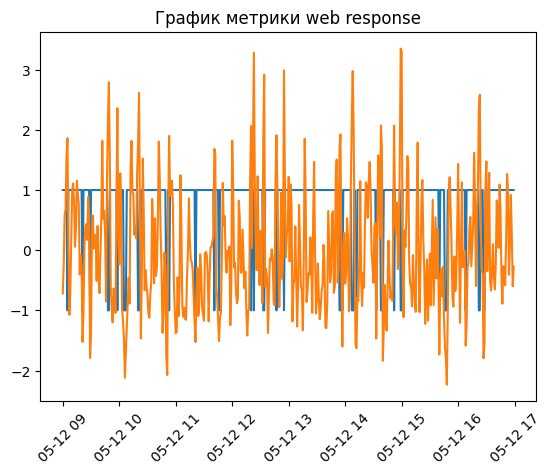

In [260]:
df1 = pd.read_csv("web_response_vis.csv")
df1['timestamp'] = df1['timestamp'].astype('datetime64[ns]')
df1 = df1[:]

plt.plot(df1['timestamp'], y_pred_web_response);
plt.plot(df1['timestamp'], df1['value']);
plt.title('График метрики web response');
plt.xticks(rotation=45);

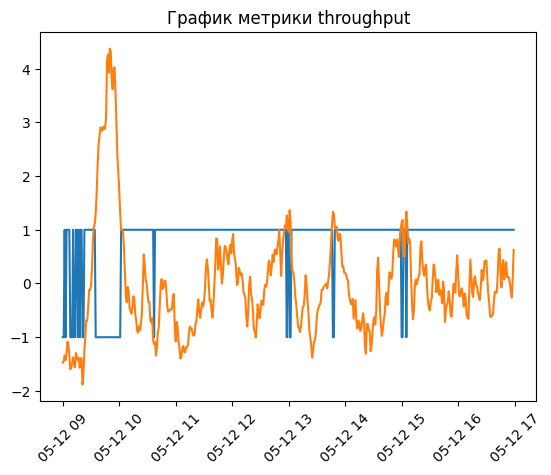

In [261]:
df2 = pd.read_csv("throughput_vis.csv")
df2['timestamp'] = df2['timestamp'].astype('datetime64[ns]')
df2 = df2[:]

plt.plot(df2['timestamp'], y_pred_throughput);
plt.plot(df2['timestamp'], df2['value']);
plt.title('График метрики throughput');
plt.xticks(rotation=45);

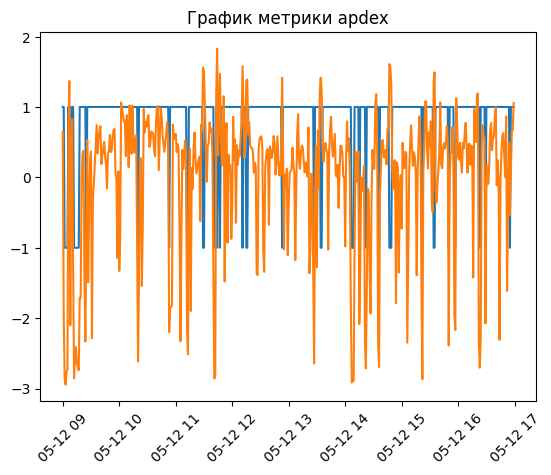

In [262]:
df3 = pd.read_csv("apdex_vis.csv")
df3['timestamp'] = df3['timestamp'].astype('datetime64[ns]')
df3 = df3[:]

plt.plot(df3['timestamp'], y_pred_apdex);
plt.plot(df3['timestamp'], df3['value']);
plt.title('График метрики apdex');
plt.xticks(rotation=45);

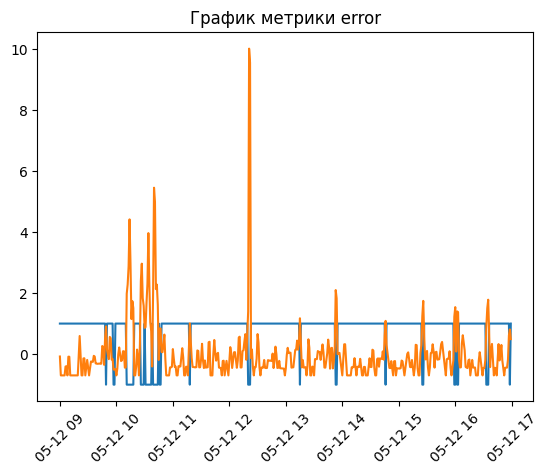

In [263]:
df4 = pd.read_csv("error_vis.csv")
df4['timestamp'] = df4['timestamp'].astype('datetime64[ns]')
df4 = df4[:]

plt.plot(df4['timestamp'], y_pred_error);
plt.plot(df4['timestamp'], df4['value']);
plt.title('График метрики error');
plt.xticks(rotation=45);